In [1]:
#Logistic regression with Titanic dataset
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Read the Data Frame

train = pd.read_csv("titanic_train.csv")

In [3]:
#get details about dataset using info() and head()

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Drop the unwanted column
train.drop(['PassengerId','Name','Ticket','Fare'], axis=1, inplace=True)

In [7]:
#new train dataset becomes

train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


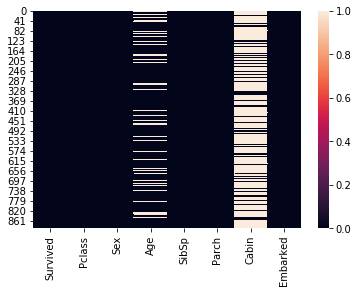

In [8]:
#Draw the heatmap to see any null entries in any column

sns.heatmap(train.isnull())

In [9]:
# From the Heatmap we can see that column Age and Cabin has some missing values
train.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
5,0,3,male,NaN,0,0,NaN,Q
6,0,1,male,54.0,0,0,E46,S
7,0,3,male,2.0,3,1,NaN,S
8,1,3,female,27.0,0,2,NaN,S
9,1,2,female,14.0,1,0,NaN,C


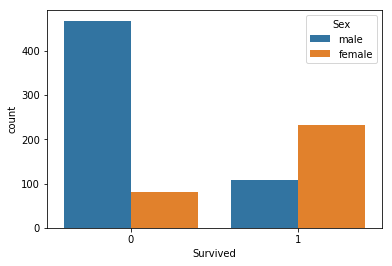

In [10]:
# Countplot of male and Female who survived
sns.countplot('Survived', hue='Sex', data=train)

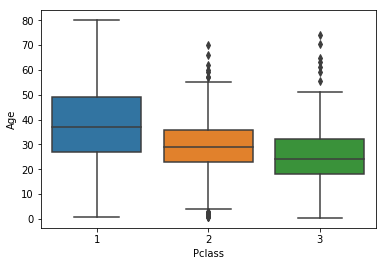

In [14]:
# Let us draw Boxplot to see the relatopnship between Pclass and Age

sns.boxplot(x='Pclass',y='Age',data=train)

In [15]:
# now we will write a function to fill missing values of Age: First find the class of missing value and 
# then replace the missing value by mean Age of that class

In [17]:
#First find the mean age for every class
#See how many unique classes are there and count of every class

train['Pclass'].nunique()
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
#Find the mean of Age for every class
#For Pclass ==1
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [25]:
# For Pclass==2
train[train['Pclass']==2]['Age'].mean()

29.87763005780347

In [26]:
#For Pclass==3
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [31]:
# Write a function Replace_age
def replace_age(x):
    Pclass = x[0]
    Age = x[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
            return 29
        else:
            return 25
    else:
        return Age
        

In [33]:
#apply replace_age function on Age column

train['Age']= train[['Pclass','Age']].apply(replace_age,axis=1)

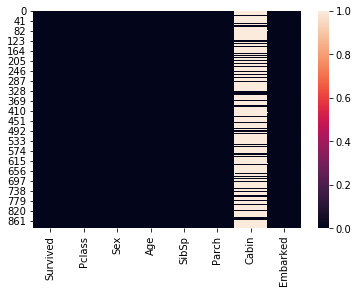

In [35]:
#Draw heatmap agin to see missing values
sns.heatmap(train.isnull())

In [36]:
#Drop the cabin column as we don't use it further
train.drop(['Cabin'], axis=1, inplace=True)

In [37]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [38]:
#  Converting categorical data of Sex and Embarked into numbers with Pandas, use get_dummies function

sex = pd.get_dummies(train['Sex'],drop_first=True)

In [39]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [40]:
# Noww drop the original column of Sex and Emarked and concat dataframe with sex and embark
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [41]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [44]:
# now concat three dataframe
train = pd.concat([train,sex,embark], axis=1)

In [45]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1
